In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
mymat = np.array([[20,-5], [8,2], [-6,3],[6,-4]]).T #Notice the notation is different than the slides!

In [3]:
mymat.shape

(2, 4)

In [4]:
mymat

array([[20,  8, -6,  6],
       [-5,  2,  3, -4]])

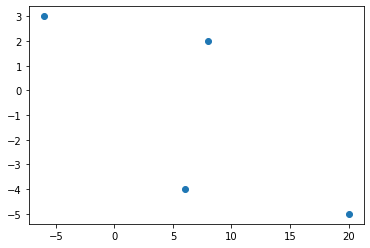

In [5]:
plt.scatter(x = mymat[0,:], y = mymat[1,:])

## Correlations & Covariance & Normalization & Whitening

#### Covariance

In [6]:
np.cov(mymat, bias = True)

array([[ 85. , -24.5],
       [-24.5,  12.5]])

In [7]:
#Now manually!

mean_values = mymat.mean(axis = 1).reshape(-1,1)
mymat - mean_values
np.dot((mymat-mean_values) , (mymat - mean_values).T) /4 ### Notice this is using dividing by n-1

array([[ 85. , -24.5],
       [-24.5,  12.5]])

In [8]:
mymat

array([[20,  8, -6,  6],
       [-5,  2,  3, -4]])

#### Correlation

In [9]:
np.corrcoef(mymat)

array([[ 1.        , -0.75162569],
       [-0.75162569,  1.        ]])

In [10]:
24.5/(np.std(mymat[0,:]) * np.std(mymat[1,:]))

0.751625689070423

#### Normalization

In [11]:
from sklearn import preprocessing

In [12]:
scaler = preprocessing.StandardScaler().fit(mymat.T) ###notice SK Learn does things in obs x features (not features x obs)
X_scaled = scaler.transform(mymat.T)
scaler.mean_
scaler.scale_
X_scaled = scaler.transform(mymat.T)

In [13]:
X_scaled.T

array([[ 1.41004798,  0.10846523, -1.41004798, -0.10846523],
       [-1.13137085,  0.84852814,  1.13137085, -0.84852814]])

In [14]:
scaler.scale_

array([9.21954446, 3.53553391])

#### Whitening

In [15]:
from scipy.linalg import fractional_matrix_power
sigma_half = fractional_matrix_power(np.cov(mymat, bias = True), -0.5)
sigma_half

array([[0.13341427, 0.09613676],
       [0.09613676, 0.41790059]])

In [16]:
whitened_data = np.dot(sigma_half, mymat - mean_values)
whitened_data

array([[ 1.34983853,  0.42182454, -1.34983853, -0.42182454],
       [-0.42182454,  1.34983853,  0.42182454, -1.34983853]])

In [17]:
np.cov(whitened_data, bias = True) 

array([[ 1.00000000e+00, -8.26811266e-16],
       [-8.26811266e-16,  1.00000000e+00]])

In [723]:
#### ZCA whitening
#borrowed heavily from  https://stackoverflow.com/questions/31528800/how-to-implement-zca-whitening-python
def zca_whitening_matrix(X):
    """
    Function to compute ZCA whitening matrix (aka Mahalanobis whitening).
    INPUT:  X: [M x N] matrix.
        Rows: Variables
        Columns: Observations
    OUTPUT: ZCAMatrix: [M x M] matrix
    """
    # Covariance matrix [column-wise variables]: Sigma = (X-mu)' * (X-mu) / N
    sigma = np.cov(X, rowvar=True, bias = True) # [M x M]
    # Singular Value Decomposition. X = U * np.diag(S) * V
    U,S,V = np.linalg.svd(sigma)
        # U: [M x M] eigenvectors of sigma.
        # S: [M x 1] eigenvalues of sigma.
        # V: [M x M] transpose of U
    # Whitening constant: prevents division by zero
    epsilon = 1e-10
    # ZCA Whitening matrix: U * Lambda * U'
    ZCAMatrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T)) # [M x M]
    return ZCAMatrix

In [724]:
my_zca_transformer = zca_whitening_matrix(mymat)
my_zca_transformer

array([[0.13341427, 0.09613676],
       [0.09613676, 0.41790059]])

In [725]:

my_zca_X = np.dot(my_zca_transformer, mymat-mean_values)
my_zca_X

array([[ 1.34983853,  0.42182454, -1.34983853, -0.42182454],
       [-0.42182454,  1.34983853,  0.42182454, -1.34983853]])

In [726]:
np.cov(my_zca_X, bias = True, rowvar = True) 

array([[ 1.00000000e+00, -5.30052312e-12],
       [-5.30052312e-12,  1.00000000e+00]])

In [727]:
###Why people use ZCA instead for whitening. 
import cv2
import matplotlib.pyplot as plt
from urllib.request import urlopen, Request
new_size = 60

urls = ['https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg',
        'https://dogtime.com/assets/uploads/2018/10/puppies-cover.jpg',
         'https://www.readersdigest.ca/wp-content/uploads/2013/03/6-facts-to-know-before-owning-a-puppy.jpg',
          'https://images.newscientist.com/wp-content/uploads/2021/06/03141753/03-june_puppies.jpg']

puppies = []
for url in urls:
    r = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    response = urlopen(r).read()
    arr = np.asarray(bytearray(response), dtype=np.uint8)
    puppies.append(cv2.imdecode(arr, 0)) # 'Load it as it is'

#item_pics = [cv2.imread( './pictures/picture_'+ str(x) + '.jpeg', 0) for x in range(1,5)]
puppies_scaled = [cv2.resize(x, [new_size,new_size], interpolation = cv2.INTER_AREA) for x in puppies]
puppies_vectors = [x.reshape(new_size * new_size) for x in puppies_scaled]

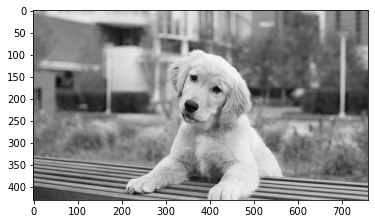

In [728]:
plt.imshow(puppies[1], cmap = "gray")

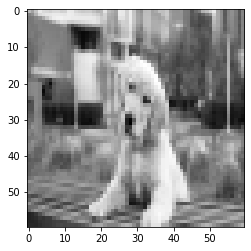

In [729]:
plt.imshow(puppies_scaled[1], cmap='gray')
#plt.imshow(puppies_vectors [0], cmap='gray')

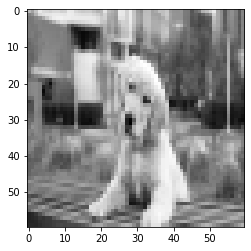

In [730]:
combined_data = np.array(puppies_vectors).T
mean_vector = np.mean(combined_data, axis = 1)
combined_data_no_mean = combined_data - mean_vector[:, None]

plt.imshow(combined_data[:,1].reshape(new_size, new_size), cmap = "gray")

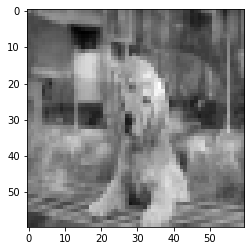

In [731]:
plt.imshow(combined_data_no_mean[:,1].reshape(new_size, new_size), cmap = "gray")

In [732]:
#ZCA whitened_picture
my_zca_transformer_image_stuff = zca_whitening_matrix(combined_data_no_mean)


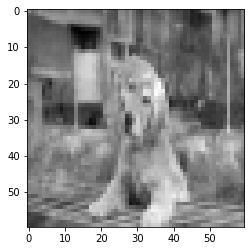

In [733]:
xZCAMatrix = np.dot(my_zca_transformer_image_stuff, combined_data_no_mean)
whitened_pics = [xZCAMatrix[:,i].reshape(new_size,new_size) for i in range(len(urls))]
plt.imshow(whitened_pics[1],  cmap='gray')


In [734]:
np.cov(xZCAMatrix, rowvar = True, bias = True)

array([[4.78672248e-04, 3.75097518e-04, 3.47090930e-04, ...,
        2.03031540e-04, 2.16823823e-04, 2.43823639e-04],
       [3.75097518e-04, 5.27085084e-04, 5.15215754e-04, ...,
        1.94796485e-04, 9.81631399e-05, 1.33357336e-04],
       [3.47090930e-04, 5.15215754e-04, 5.93900827e-04, ...,
        2.49359045e-04, 1.60362776e-04, 2.43315720e-04],
       ...,
       [2.03031540e-04, 1.94796485e-04, 2.49359045e-04, ...,
        1.39184621e-04, 1.38184551e-04, 1.87529753e-04],
       [2.16823823e-04, 9.81631399e-05, 1.60362776e-04, ...,
        1.38184551e-04, 1.89029219e-04, 2.39892339e-04],
       [2.43823639e-04, 1.33357336e-04, 2.43315720e-04, ...,
        1.87529753e-04, 2.39892339e-04, 3.19963214e-04]])

## PCA

#### Using Sklearn

In [592]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(mymat.T)

PCA(n_components=2)

In [593]:
print(pca.explained_variance_ratio_)

[0.94874725 0.05125275]


In [594]:
M = pca.components_
M

array([[ 0.95616874, -0.29281622],
       [ 0.29281622,  0.95616874]])

In [595]:
X_pca = pca.fit_transform(mymat.T)
X_pca

array([[ 13.60145851,  -0.01806411],
       [  0.07772008,   3.16132244],
       [-13.60145851,   0.01806411],
       [ -0.07772008,  -3.16132244]])

#### PCA (by hand)

In [670]:
## Let's do this manually
covariance_matrix = np.cov(mymat, bias = True, rowvar = True)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[ 0.95616874  0.29281622]
 [-0.29281622  0.95616874]] 

Eigenvalues: 
 [92.50285705  4.99714295] 



In [671]:
PCA_data = np.dot(eigen_vectors.T, mymat - mean_values)
PCA_data

array([[ 13.60145851,   0.07772008, -13.60145851,  -0.07772008],
       [ -0.01806411,   3.16132244,   0.01806411,  -3.16132244]])

In [672]:
### What about the correlations?
np.cov(PCA_data, rowvar = True, bias = True)

array([[ 9.25028570e+01, -1.57268334e-15],
       [-1.57268334e-15,  4.99714295e+00]])

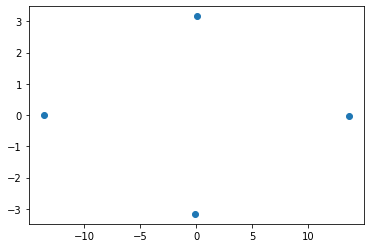

In [673]:
plt.scatter(x = PCA_data[0,:], y = PCA_data[1,:]) # does the above picture make sense?

#### PCA by hand (on puppies)

In [674]:
covariance_matrix = np.cov(combined_data, bias = True, rowvar = True)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[ 1.66143176e-02+0.00000000e+00j -1.41790126e-02+0.00000000e+00j
  -1.26195059e-03+0.00000000e+00j ...  4.44284060e-17+2.55369502e-17j
   8.35110459e-17+9.84505780e-17j  8.35110459e-17-9.84505780e-17j]
 [ 1.75427032e-02+0.00000000e+00j -4.64715511e-03+0.00000000e+00j
  -1.40621149e-02+0.00000000e+00j ... -3.42845035e-16+6.38677147e-17j
  -6.01301410e-16-4.71486943e-16j -6.01301410e-16+4.71486943e-16j]
 [ 1.13171180e-02+0.00000000e+00j -9.49320759e-03+0.00000000e+00j
  -1.93830426e-02+0.00000000e+00j ... -3.75847349e-16+6.50533814e-17j
  -6.27339256e-16-4.77681433e-16j -6.27339256e-16+4.77681433e-16j]
 ...
 [ 3.74285534e-03+0.00000000e+00j -9.39237953e-03+0.00000000e+00j
  -6.07937712e-03+0.00000000e+00j ...  2.93207307e-14-4.01646890e-15j
   4.28777024e-14+2.80675096e-14j  4.28777024e-14-2.80675096e-14j]
 [ 1.33109480e-03+0.00000000e+00j -1.36604622e-02+0.00000000e+00j
  -8.05705127e-04+0.00000000e+00j ...  1.15743545e-15+6.69861136e-16j
   1.46444603e-15+1.04838126e-15

#### PCA completely changes the basis

In [679]:
PCA_data = np.dot(eigen_vectors.T, combined_data_no_mean).real
PCA_data

array([[-2.91567711e+02, -1.72213016e+03,  3.00455384e+03,
        -9.90855973e+02],
       [ 1.47723234e+03, -1.55250529e+03, -5.42702346e+02,
         6.17975298e+02],
       [ 1.15702272e+03,  5.15848059e+02, -1.08090548e+02,
        -1.56478023e+03],
       ...,
       [-2.85438351e-15,  4.48365223e-15,  1.62962202e-15,
         1.82800636e-16],
       [ 3.30972094e-15,  2.14772275e-14, -9.31385846e-15,
         1.51332231e-15],
       [ 3.30972094e-15,  2.14772275e-14, -9.31385846e-15,
         1.51332231e-15]])

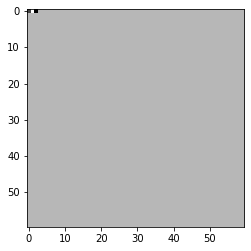

In [680]:
pca_pics = [PCA_data[:,i].reshape(new_size,new_size) for i in range(len(urls))]
plt.imshow(pca_pics[3],  cmap='gray')

In [665]:
# more information:
#https://stats.stackexchange.com/questions/117427/what-is-the-difference-between-zca-whitening-and-pca-whitening

In [683]:
np.cov(PCA_data, rowvar= True, bias = True)

array([[ 3.26497084e+06,  6.65967949e-10, -3.86001889e-11, ...,
        -5.43507165e-13, -1.68587656e-11, -1.68587656e-11],
       [ 6.65967949e-10,  1.31722685e+06,  2.75627491e-10, ...,
        -2.98722872e-12, -5.61610848e-12, -5.61610848e-12],
       [-3.86001889e-11,  2.75627491e-10,  1.01625538e+06, ...,
        -3.62973204e-13,  3.38678292e-12,  3.38678292e-12],
       ...,
       [-5.43507165e-13, -2.98722872e-12, -3.62973204e-13, ...,
         6.99460416e-30,  1.43330691e-29,  1.43330691e-29],
       [-1.68587656e-11, -5.61610848e-12,  3.38678292e-12, ...,
         1.43330691e-29,  1.22282277e-28,  1.22282277e-28],
       [-1.68587656e-11, -5.61610848e-12,  3.38678292e-12, ...,
         1.43330691e-29,  1.22282277e-28,  1.22282277e-28]])